## Big Mart Sales

## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## About the DataSet :
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

|Features|Description|
|-----|-----|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|
|source|is it a train data or test data point|

 

### Load the data

Just to inform you guys that this data is preprocessed with necessary missing value imputation and feature engineering and encoding of features.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Data preparation 

In [2]:
sales_data = pd.read_csv("../data/sales.csv",index_col=False)

#Drop unnecessary columns:
sales_data.drop(['source'],axis=1,inplace=True)

In [3]:
sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [4]:
sales_data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Years                   int64
Item_Fat_Content_0             int64
Item_Fat_Content_1             int64
Item_Fat_Content_2             int64
Outlet_Location_Type_0         int64
Outlet_Location_Type_1         int64
Outlet_Location_Type_2         int64
Outlet_Size_0                  int64
Outlet_Size_1                  int64
Outlet_Size_2                  int64
Outlet_Type_0                  int64
Outlet_Type_1                  int64
Outlet_Type_2                  int64
Outlet_Type_3                  int64
Item_Type_Combined_0           int64
Item_Type_Combined_1           int64
Item_Type_Combined_2           int64
Outlet_Identifier_0            int64
Outlet_Identifier_1            int64
Outlet_Identifier_2            int64
O

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_MRP                   8523 non-null   float64
 2   Item_Outlet_Sales          8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Weight                8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Years               8523 non-null   int64  
 8   Item_Fat_Content_0         8523 non-null   int64  
 9   Item_Fat_Content_1         8523 non-null   int64  
 10  Item_Fat_Content_2         8523 non-null   int64  
 11  Outlet_Location_Type_0     8523 non-null   int64  
 12  Outlet_Location_Type_1     8523 non-null   int64  
 13  Outlet_Location_Type_2     8523 non-null   int64

In [6]:
sales_data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,2181.288914,0.066132,12.873623,1997.831867,15.168133,0.459697,0.187610,0.352693,0.280183,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,62.275067,1706.499616,0.051598,4.645893,8.371760,8.371760,0.498402,0.390423,0.477836,0.449115,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,31.290000,33.290000,0.000000,4.555000,1985.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.826500,834.247400,0.026989,8.785000,1987.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143.012800,1794.331000,0.053931,12.600000,1999.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,185.643700,3101.296400,0.094585,16.850000,2004.000000,26.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,28.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
sales_data.isnull().sum()

Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Years                 0
Item_Fat_Content_0           0
Item_Fat_Content_1           0
Item_Fat_Content_2           0
Outlet_Location_Type_0       0
Outlet_Location_Type_1       0
Outlet_Location_Type_2       0
Outlet_Size_0                0
Outlet_Size_1                0
Outlet_Size_2                0
Outlet_Type_0                0
Outlet_Type_1                0
Outlet_Type_2                0
Outlet_Type_3                0
Item_Type_Combined_0         0
Item_Type_Combined_1         0
Item_Type_Combined_2         0
Outlet_Identifier_0          0
Outlet_Identifier_1          0
Outlet_Identifier_2          0
Outlet_Identifier_3          0
Outlet_Identifier_4          0
Outlet_Identifier_5          0
Outlet_Identifier_6          0
Outlet_Identifier_7          0
Outlet_I

### Questions for EDA

* 1.Find top 20 outlets wrt sales
* 2.Find top 20 costliest items
* 3.Find age distribution of the stores (Use Year to calculate age of the store)
* 4.Find correlaton between weight and MRP
* 5.Find correlation between MRP and sales
* 6.Find correlaton between weight and sales
* 7.Find correlation between MRP and weight
* 8.Find the price distribution wrt Fat Content Category
* 9.Price distribution wrt establishment year
* 10.Sales distribution wrt establishment year
* 11.Find sales distribution for different location types
* 12.Find sales distribution for different outlet types
* 13.Find sales distribution for different outlet size
* 14.Is there a correlation between outlet type and its size?
* 15.Find sales distribution wrt Location


In [8]:
# 1.Find top 20 outlets wrt sales
sales_data.Item_Outlet_Sales.nlargest(20).index

Int64Index([7188, 5223, 1450, 4349, 6541, 4888, 1009, 7191, 4289, 7752, 4961,
            5500, 6606, 3098, 8201, 2109,  997,  333, 4346, 7930],
           dtype='int64')

In [9]:
sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,26,0,1,...,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

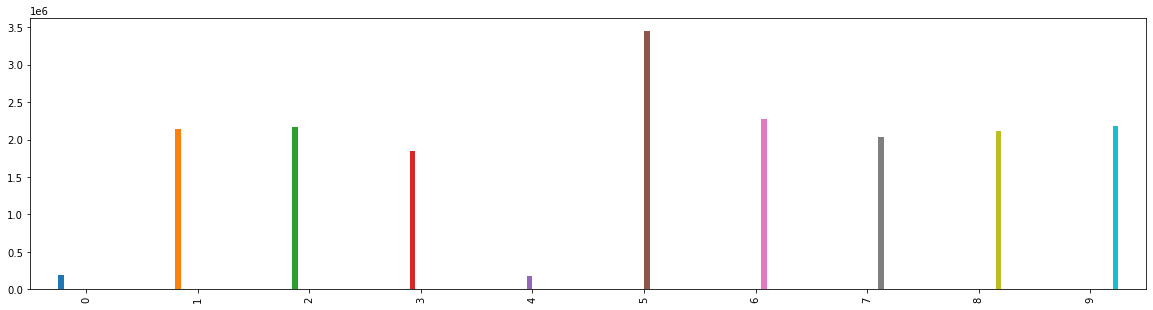

In [10]:
# 1.Find item type for top 20 Sales

result = []

for outlet in [i for i in sales_data.columns if 'Outlet_Identifier' in i]:
    df = sales_data[sales_data[outlet] == 1]
    result.append({outlet : df['Item_Outlet_Sales'].sum()})
pd.DataFrame(result).plot(kind = 'bar', legend = False, figsize = (20,5))

In [11]:
# 2. top 20 costliest items

# sales_data.Item_MRP.nlargest(20)
sales_data.nlargest(20 ,'Item_MRP')[['Item_Identifier','Item_MRP']]
#sales_data.sort_values('Item_MRP',ascending = False)[['Item_Identifier', 'Item_MRP']][:20]


,Item_Identifier,Item_MRP
4802,FDS13,266.8884
5884,FDR25,266.8884
4159,FDK51,266.6884
5254,NCS29,266.6884
4538,FDS13,266.5884
5558,NCS29,266.5884
4877,NCS29,266.2884
3416,FDK51,266.1884
3714,FDS13,266.1884
8375,NCM05,266.0226


(array([1854.,    0., 1859.,    0., 1485.,  930.,    0.,    0.,    0.,
        2395.]),
 array([ 4. ,  6.4,  8.8, 11.2, 13.6, 16. , 18.4, 20.8, 23.2, 25.6, 28. ]),
 <BarContainer object of 10 artists>)

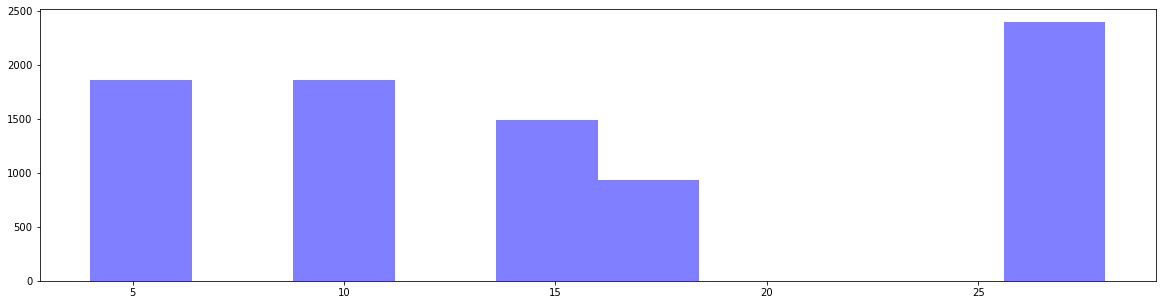

In [12]:
# 3.Find age distribution of the stores (Use Year to calculate age of the store)

plt.figure(figsize = (20,5))
plt.hist(sales_data['Outlet_Years'], facecolor='blue', alpha=0.5)



0.026172322062420456

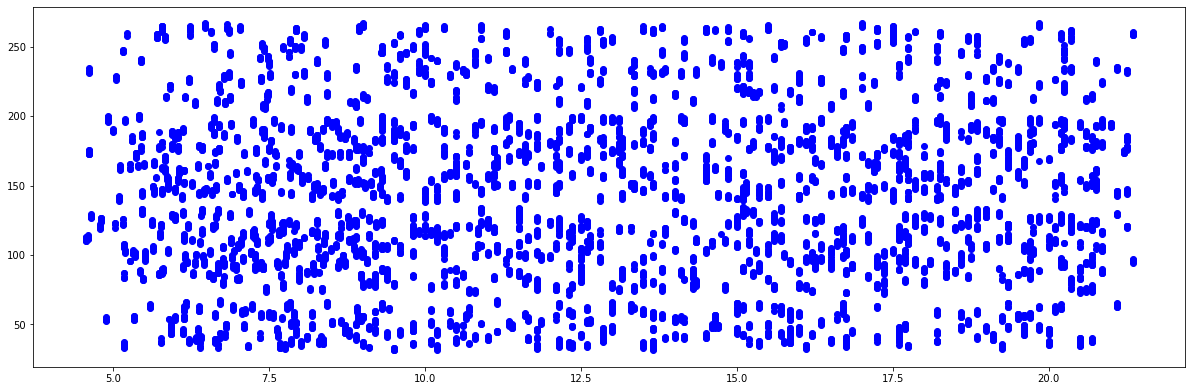

In [13]:
# 4.Find correlaton between weight and MRP
fig=plt.figure(figsize=(16,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(sales_data['Item_Weight'], sales_data['Item_MRP'], color='b')
sales_data['Item_MRP'].corr(sales_data['Item_Weight'])


0.5675744466569194

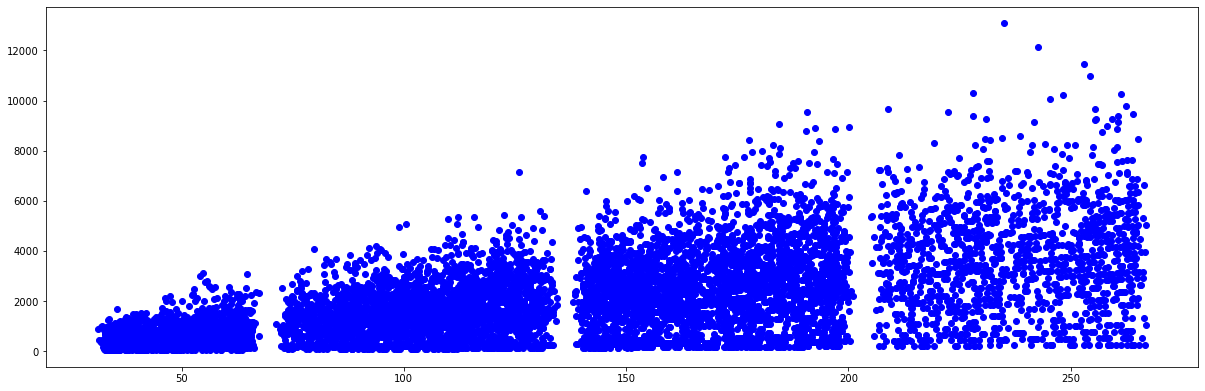

In [14]:
#5.Find correlation between MRP and sales

fig=plt.figure(figsize=(16,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(sales_data['Item_MRP'], sales_data['Item_Outlet_Sales'], color='b')

sales_data['Item_MRP'].corr(sales_data['Item_Outlet_Sales'])


In [15]:
sales_data['Item_Sales_Qnty'] = sales_data['Item_Outlet_Sales']/sales_data['Item_MRP']

0.011143527012324836

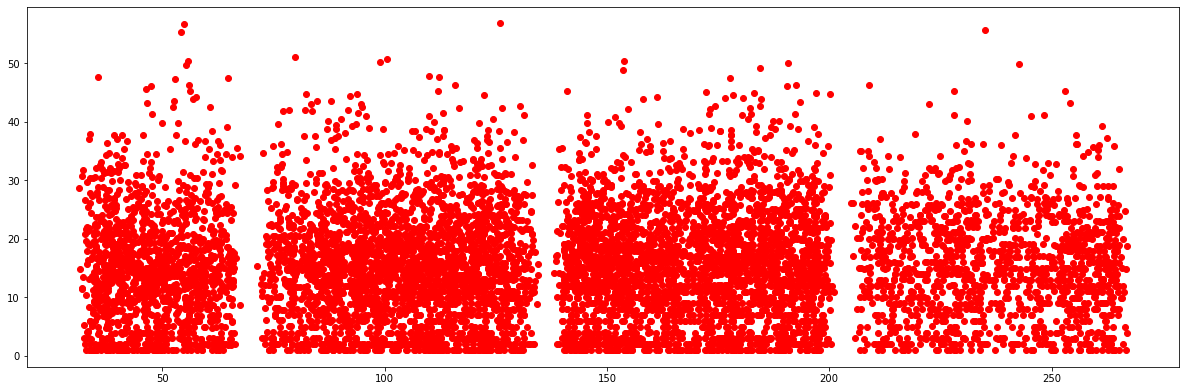

In [16]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(sales_data['Item_MRP'], sales_data['Item_Sales_Qnty'], color='r')

sales_data['Item_MRP'].corr(sales_data['Item_Sales_Qnty'])


0.01326123638229943

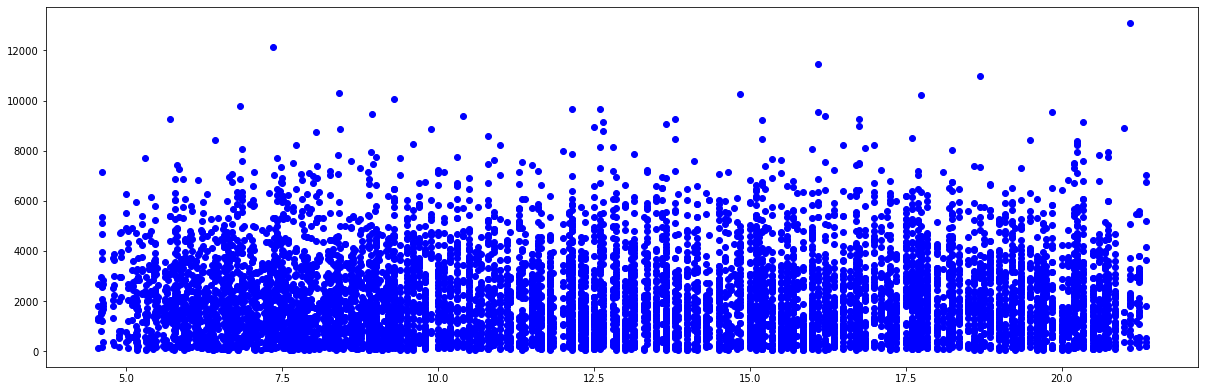

In [17]:
# 6.Find correlaton between weight and sales


fig=plt.figure(figsize=(16,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(sales_data['Item_Weight'], sales_data['Item_Outlet_Sales'], color='b')

sales_data['Item_Weight'].corr(sales_data['Item_Outlet_Sales'])

0.026172322062420456

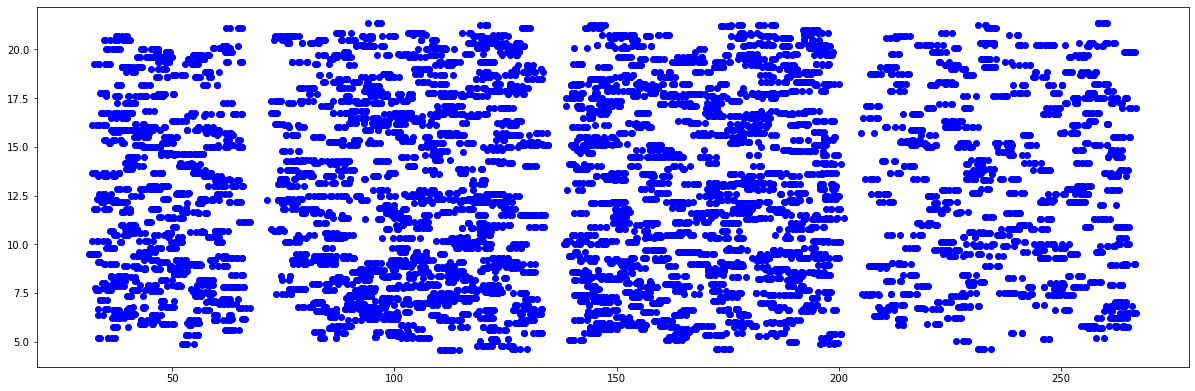

In [18]:
# 7.Find correlation between MRP and weight

fig=plt.figure(figsize=(16,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(sales_data['Item_MRP'], sales_data['Item_Weight'], color='b')

sales_data['Item_MRP'].corr(sales_data['Item_Weight'])

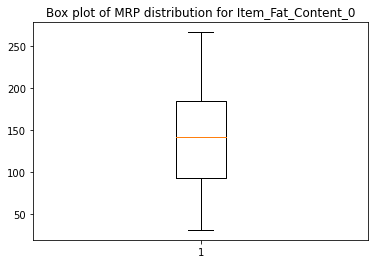

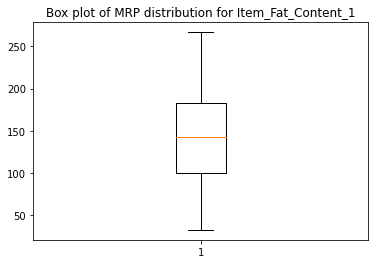

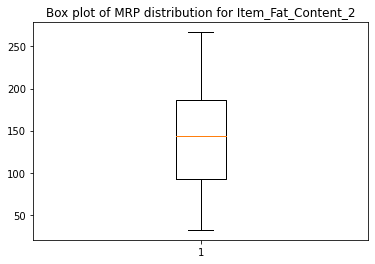

In [19]:
# 8.Find the price distribution wrt Fat Content Category

for fat in [i for i in sales_data.columns if 'Item_Fat_Content' in i]:
    df = sales_data[sales_data[fat] == 1]
    plt.boxplot(df['Item_MRP'])
    plt.title(f"Box plot of MRP distribution for {fat}")
    plt.show()
    print("="*100)


In [20]:
sales_data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Item_Sales_Qnty'],
      dtype='object')

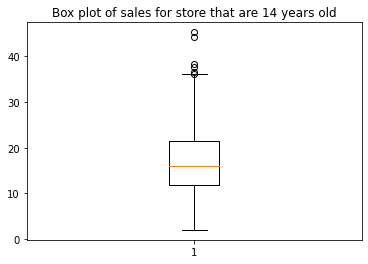

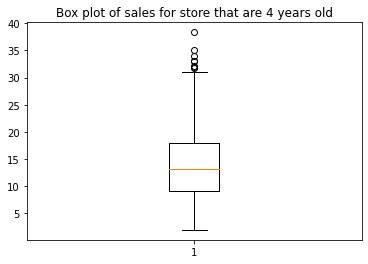

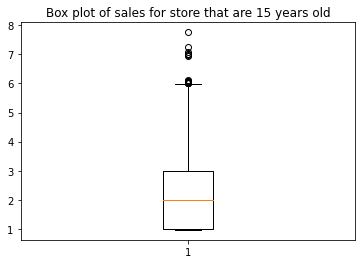

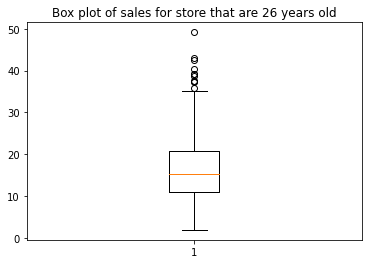

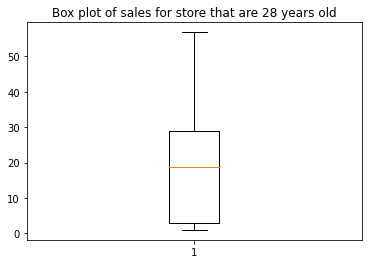

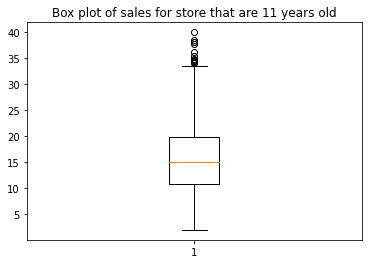

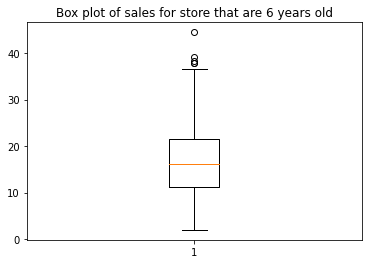

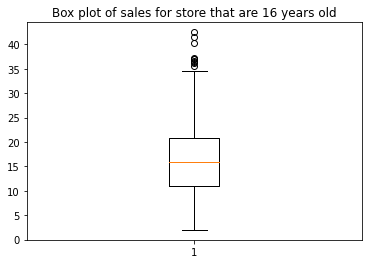

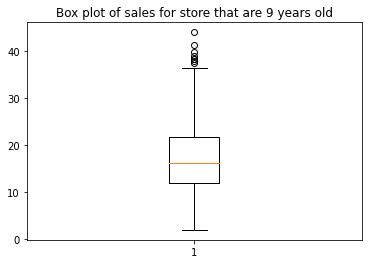

In [21]:
# 10.Sales distribution wrt establishment year

for year in sales_data['Outlet_Years'].unique():
    df = sales_data[sales_data['Outlet_Years'] == year]
    plt.boxplot(df['Item_Sales_Qnty'])
    plt.title(f"Box plot of sales for store that are {year} years old")
    plt.show()
    print("="*100)

In [22]:
sales_data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Item_Sales_Qnty'],
      dtype='object')

In [24]:
ml_data = sales_data.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Sales_Qnty'], axis = 1)

In [25]:
# OHE for item type

ml_ohe_data = pd.get_dummies(ml_data,columns = ['Item_Type'])

### Lets try to plot and predict the model by using polynomial features with degree 6?

In [26]:
X = ml_ohe_data.drop(['Item_Outlet_Sales'], axis = 1)
y = ml_ohe_data['Item_Outlet_Sales'] 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =1, train_size = 0.8)

In [28]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
  
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1144.573367980163


In [31]:
lr.score(X_train, y_train)

0.5645501365547604

### Create a baseline regression model and observe the error measured.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Let's try out to set up a baseline model with just two explanatory variables
X1 = sales_data.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Visibility']]

x_train1, x_cv1, y_train1, y_cv1 = train_test_split(X1, sales_data.Item_Outlet_Sales.values, test_size=0.3, random_state =43)

# Intiating baseline model
alg1 = LinearRegression(normalize=True)
alg1.fit(x_train1, y_train1)

# Predicting on the sample subset 
yhat1 = alg1.predict(x_cv1)

# Calculating error

print('Mean Squared Error is',mean_squared_error(y_cv1, yhat1))

# R-Square

print('R Square Score is ', r2_score(y_cv1, yhat1))

Mean Squared Error is 1949472.2441449496
R Square Score is  0.3372350701376966


In [32]:
from sklearn. ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(rf.score(X_train, y_train))

1156.6016556924267
0.9383119236933314
